In [172]:
from random import random
import matplotlib.pyplot as plt
from math import sqrt
plt.style.use("ggplot")

In [184]:
rosen2 = lambda x: (1-x[0])**2+100*(x[1]-x[0]**2)**2

In [185]:
def rank(x):
    n = len(x)
    y = sorted(x)
    res = []
    for i in range(n):
        for j in range(n):
            if x[j] == y[i]:
                break
        res.append(j)
    return res

In [162]:
# 벡터 덧셈, 스칼라곱, 뺄셈
add = lambda x,y: [x[i]+y[i] for i in range(len(x))]
scalar = lambda c,x: [c*x[i] for i in range(len(x))]
subtract = lambda x,y: add(x, scalar(-1,y))

In [163]:
pts = [[random(), random()] for _ in range(3)]
rk = rank(list(map(lambda x: rosen(x), pts)))
pts = [pts[r] for r in rk]

In [164]:
x_0 = scalar(0.5, add(pts[0], pts[1]))
x_r = add(x_0, scalar(alpha, subtract(x_0, pts[2])))
x_e = add(x_0, scalar(gamma, subtract(x_r, x_0)))
x_c = add(x_0, scalar(rho, subtract(pts[2], x_0)))
x_s1 = add(pts[0], scalar(sigma, subtract(pts[1], pts[0])))
x_s2 = add(pts[0], scalar(sigma, subtract(pts[2], pts[0])))

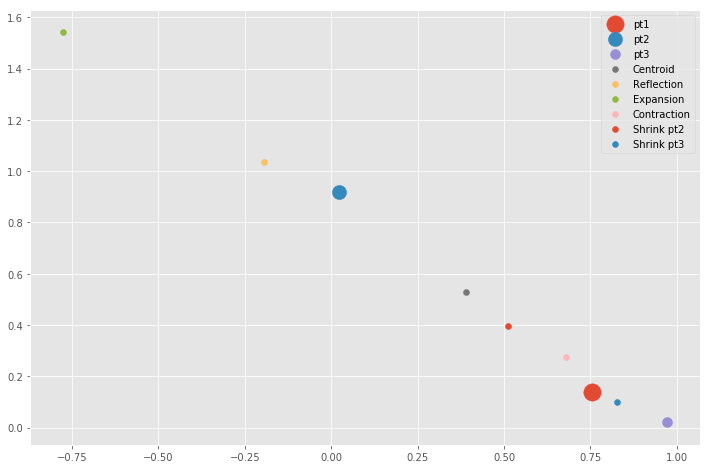

In [165]:
plt.figure(figsize=(12,8))
plt.scatter(pts[0][0], pts[0][1], s=300, label="pt1")
plt.scatter(pts[1][0], pts[1][1], s=200, label="pt2")
plt.scatter(pts[2][0], pts[2][1], s=100, label="pt3")
plt.scatter(x_0[0], x_0[1], label="Centroid")
plt.scatter(x_r[0], x_r[1], label="Reflection")
plt.scatter(x_e[0], x_e[1], label="Expansion")
plt.scatter(x_c[0], x_c[1], label="Contraction")
plt.scatter(x_s1[0], x_s1[1], label="Shrink pt2")
plt.scatter(x_s2[0], x_s2[1], label="Shrink pt3")
plt.legend()
plt.show()

In [182]:
def nelder_mead(f, p):
    
    # setup
    alpha = 1
    gamma = 2
    rho = 1/2
    sigma = 1/2
    n = 1000
    eps = 1e-9
    
    # Loop
    for _ in range(n):
        
        # Order
        rk = rank(list(map(lambda x: f(x), p)))
        p = [p[r] for r in rk]
        x_0 = scalar(0.5, add(p[0], p[1]))
        x_r = add(x_0, scalar(alpha, subtract(x_0, p[2])))

        y_r = f(x_r)
        y_1 = f(p[1])
        y_0 = f(p[0])
        
        # Reflection
        if y_0 <= y_r and y_r < y_1:
            p[2] = x_r
            #print("Reflection")
            
        # Expansion
        elif y_r < y_0:
            x_e = add(x_0, scalar(gamma, subtract(x_r, x_0)))
            if f(x_e) < y_r:
                p[2] = x_e
                #print("Expansion 1")
            else:
                p[2] = x_r
                #print("Expansion 2") 
                
        # Contraction
        elif y_r >= y_1:  
            x_c = add(x_0, scalar(rho, subtract(p[2], x_0)))
            if f(x_c) < f(p[2]):
                p[2] = x_c
                #print("Contraction")
            # Shrink
            else:
                p[1] = add(p[0], scalar(sigma, subtract(p[1], p[0])))
                p[2] = add(p[0], scalar(sigma, subtract(p[2], p[0])))
                #print("Shrink")
                
        # Exit
        y = [f(p[i]) for i in range(3)]
        mu = sum(y)/len(y)
        std = sqrt(sum([(y[i] - mu)**2 for i in range(3)])/len(y))
        if std < eps:
            break
 
    return scalar(1/3, add(add(p[0], p[1]), p[2]))

In [183]:
pts = [[1,10], [10,3], [30,1]]
nelder_mead(rosen2, pts)

[1.000010728382164, 1.0000216731211538]